In [1]:
data = '''In the town of Athy one Jeremy Lanigan
Battered away til he hadnt a pound.
His father died and made him a man again
Left him a farm and ten acres of ground.

He gave a grand party for friends and relations
Who didnt forget him when come to the wall,
And if youll but listen Ill make your eyes glisten
Of the rows and the ructions of Lanigan’s Ball.

Myself to be sure got free invitation,
For all the nice girls and boys I might ask,
And just in a minute both friends and relations
Were dancing round merry as bees round a cask.

Judy ODaly, that nice little milliner,
She tipped me a wink for to give her a call,
And I soon arrived with Peggy McGilligan
Just in time for Lanigans Ball.
'''


#the above string would be used for this session 
#our aim is to use Tensorflow to create Text

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

import numpy as np
import matplotlib.pyplot as plt


tokenizer = Tokenizer()
corpus = data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sentences = token_list[:i+1]
        input_sequences.append(n_gram_sentences)

max_sequence_len = max([len(x) for x in input_sequences]) #get the length of the longest seq
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

xs, labels = input_sequences[:, :-1], input_sequences[:, -1]
ys = utils.to_categorical(labels, num_classes=total_words)

In [5]:
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(max_sequence_len-1))) #subtract one as we would be predicting the last WORD
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=1500, verbose=0)

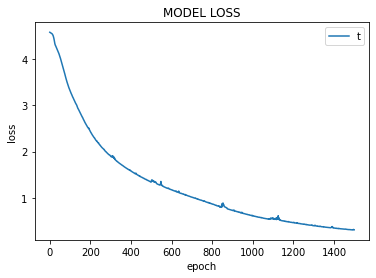

In [16]:
plt.plot(history.history['loss'])
plt.title('MODEL LOSS')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend('train', loc='best')
plt.show()

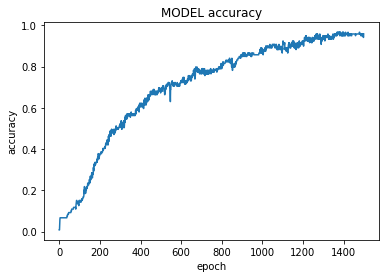

In [17]:
plt.plot(history.history['accuracy'])
plt.title('MODEL accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [51]:
#let's try to predict text
seed_text = 'in the town of athy'
toks_list = tokenizer.texts_to_sequences([seed_text])[0]
toks_list = pad_sequences([toks_list], maxlen=max_sequence_len-1, padding='pre')

#check the first line of our poem for the answer, which is 'ONE"
predicted = np.argmax(model.predict(toks_list), axis=-1)
predicted

array([19], dtype=int64)

In [19]:
#check if we got the answer correctly
for word, index in tokenizer.word_index.items():
    if index == predicted:
        print(word)
        break

one


In [55]:
#now let's try to create text by continously appending previous words.

seed_text = 'sweet jeremy saw dublin'
next_words = 10

for _ in range(next_words):
    toks_list = tokenizer.texts_to_sequences([seed_text])[0]
    toks_list = pad_sequences([toks_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(toks_list, verbose=0), axis=-1)
    output_word = ''

    for word, index in tokenizer.word_index.items():
        if index == int(predicted):
            output_word = word
            break
    seed_text += ' ' + output_word

print(seed_text)
#the text being output is non-sensical because the training data is little.
#we can get better TEXT CREATED if the training data is huge

sweet jeremy saw dublin youll but but listen make your eyes glisten ground ground


In [ ]:
#another model architecture to try
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(max_sequence_len-1, return_sequences=True)))
model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=1000, verbose=0)



In [ ]:
window_size = 10
sentences = []
alltext = []
data = open('enter file path')
corpus = data.lower()
words = corpus.split(' ')
range_size = len(words) - max_sequence_len
for i in range(0, range_size):
    thissentence = ''
    for word in range(0, window_size-1):
        word = words[i+word]
        thissentence = thissentence + word
        thissentence = thissentence + ' '
    sentences.append(thissentence)




